In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams['lines.linewidth'] = 0.2

import numpy as np
import pandas as pd

import experiments
import dataset

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [109]:
class PowerTraceDataset(Dataset):
    def __init__(self, pickle_file, trace_size, transform=None):
        self.df = pd.read_pickle(pickle_file)
        self.trace_size = trace_size
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        plain, key, cipher, trace = self.df.iloc[index, :4]

        if trace.size < self.trace_size:
            trace = np.pad(trace, (0, self.trace_size), constant_values=0)
        else:
            trace = trace[:self.trace_size]

        trace = np.expand_dims(trace, 0)

        key = np.eye(256, dtype=np.uint8)[key[0]]
        return trace, key
        #
        # sample = {
        #     'plain': plain,
        #     'key': key,
        #     'cipher': cipher,
        #     'trace': trace
        # }
        #
        # return sample




In [3]:
ds = dataset.PickleTraceDataset('./data/DPO4032_10_211102-181109.pkl', trace_size=35000, scaler=StandardScaler())
dl = DataLoader(ds, batch_size=4, shuffle=True)

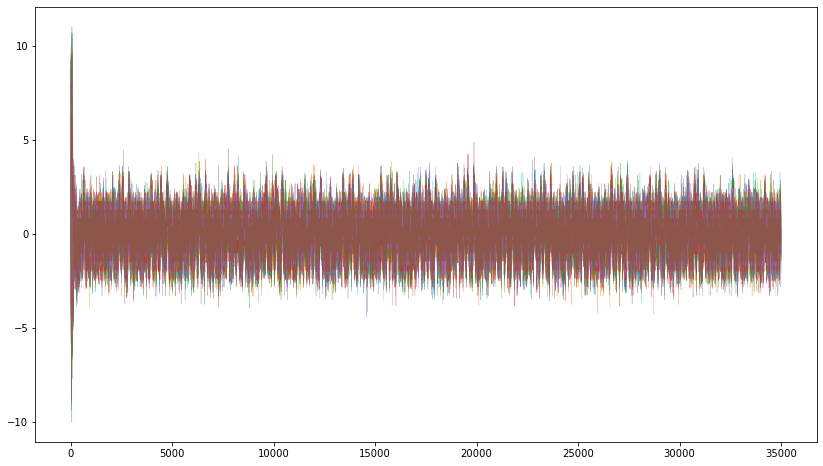

In [7]:
for _ in range(16):
    feat = next(iter(dl))
    arr = feat['trace'][0]

    plt.plot(arr.flatten())

plt.show()